# Introduction


## Content-Based Image Retrieval (CBIR) Systems

Content-Based Image Retrieval (CBIR) systems represent a paradigm shift in image retrieval technology. Unlike traditional keyword-based searches, CBIR systems enable the retrieval of images based on visual content. These systems analyze the actual contents of the image such as color, shape, texture, and spatial layout, rather than relying on manually entered metadata or descriptions. This approach is particularly beneficial in fields where visual details are paramount, such as digital libraries, medical imaging, criminal investigation, and multimedia applications.

The fundamental idea behind CBIR is to enable users to find images that are visually similar to a query image. This process involves extracting features from images in a database, comparing these features with those of a query image, and then ranking the database images based on their similarity to the query. The effectiveness of a CBIR system largely depends on the accuracy and relevance of the extracted features.

## Importance of Color Features in CBIR

Among the various visual features used in CBIR, color is one of the most significant and widely utilized. The reasons for the prominence of color features in image retrieval are manifold:

1. **Perceptual Significance:** Color is a key attribute that the human visual system naturally uses to distinguish and recognize objects and scenes. Therefore, color-based retrieval often aligns well with human perception, making the retrieval process more intuitive and effective.

2. **Robustness and Invariance:** Color features are generally robust against background complexity and are less affected by changes in image size, orientation, and partial occlusion. This robustness makes color a reliable feature for image retrieval.

3. **Computational Efficiency:** Color features can be relatively easier and faster to compute compared to other complex features like texture or shape. This efficiency is crucial for handling large image databases and ensuring a responsive CBIR system.

4. **Complementary Nature:** Color features can be effectively combined with other features (like texture or shape) to enhance the retrieval performance. This complementary nature allows for the development of more sophisticated and accurate CBIR systems.

In this assignment, we will delve into the implementation of CBIR systems, focusing particularly on the role and effectiveness of color features. We will explore different methods of representing color in images, such as color histograms and color moments, and evaluate their impact on the retrieval performance of the CBIR system.

---

# Background Theory

In this section, we delve into the theoretical underpinnings of color feature extraction techniques commonly used in Content-Based Image Retrieval (CBIR) systems. Understanding these concepts is crucial for implementing an effective CBIR system.


## Color Histograms

A color histogram is a representation of the distribution of colors in an image. It is one of the simplest and most widely used methods for color feature extraction in image retrieval systems. A histogram divides the entire color space of an image into a finite number of bins and then counts the number of pixels that fall into each bin. The result is a graph or a vector that represents the frequency of each color in the image.

### Significance of Color Histograms:
- **Universality:** Color histograms are not specific to any particular type of image and can be applied universally across different domains.
- **Simplicity and Efficiency:** They are relatively simple to compute and can be efficiently used even in large-scale image databases.
- **Robustness:** Histograms are generally robust to minor changes in camera viewpoint, image scaling, and rotation.

However, color histograms have limitations, including insensitivity to spatial distribution of colors and potential loss of information due to binning.



## Color Moments

Color moments are statistical measures that provide a summary of the color distribution in an image. The first few moments (mean, standard deviation, and skewness) are often used to capture the essence of the color distribution.

### Importance of Color Moments:
- **Compact Representation:** Moments provide a more compact representation of color features compared to histograms.
- **Computational Efficiency:** They are computationally less intensive than histograms.
- **Sensitivity to Color Variations:** Moments can capture subtle variations in color distributions, which might be missed by histograms.

However, color moments may not capture the full complexity of color distributions in an image, especially in highly textured or multi-colored images.


## Application in CBIR

Both color histograms and color moments play pivotal roles in the development of CBIR systems. They offer a means to quantitatively describe the color characteristics of an image, which are crucial for similarity comparisons in retrieval tasks. By effectively utilizing these color features, a CBIR system can provide more accurate and perceptually relevant results.

In summary, understanding and effectively implementing these color feature extraction techniques is fundamental in building a robust and efficient CBIR system. In the following sections, we will explore how these concepts are applied in practice and analyze their effectiveness in real-world scenarios.

---

# System Architecture Overview

In this section, we outline the overall architecture of our Content-Based Image Retrieval (CBIR) system. The architecture is designed to be efficient, scalable, and effective in retrieving visually similar images based on color features.



## CBIR System Architecture

The architecture of our CBIR system can be divided into several key components:

1. **Image Database:** A collection of images that serves as the dataset for retrieval. This database can consist of various types of images, depending on the application domain.

2. **Feature Extraction Module:** This module is responsible for extracting relevant color features from each image in the database. It uses color histograms and color moments techniques to represent the color distribution and characteristics of the images.

3. **Feature Database:** Once extracted, the color features of each image are stored in a feature database. This database enables efficient matching and retrieval processes.

4. **Query Interface:** The user interacts with the system through a query interface, where they can submit a query image. The system then extracts color features from this query image using the same methods applied to the database images.

5. **Similarity Measurement and Retrieval:** The core of the system, this component compares the query image's features with those in the feature database. It uses similarity measures like Euclidean distance, cosine similarity, or other relevant metrics to determine the closeness of the features.

6. **Ranking and Result Display:** Based on the similarity scores, the system ranks the images in the database and displays the most similar images to the user.

7. **Feedback Mechanism (Optional):** Some CBIR systems include a feedback mechanism where users can provide input on the relevance of retrieved images, allowing the system to refine its retrieval process.

This architecture is designed to be modular, where each component can be independently developed and optimized. The use of color histograms and moments allows for a balance between computational efficiency and retrieval accuracy.

## Implementation Setup

In the following code cell, we import the necessary libraries and modules required for building our CBIR system.



In [1]:
# Importing necessary libraries
import cv2
import os
from scipy.spatial import distance
from scipy.spatial.distance import cosine
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, pairwise_distances
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import numpy as np
import time


In the upcoming sections, we will delve into the implementation details of each module, starting with the data loading and preprocessing.

---


# Data Loading and Preprocessing

In this section, we focus on the initial phase of our CBIR system - loading and preprocessing the images from the dataset. This stage is crucial as it sets the foundation for feature extraction and subsequent image retrieval processes.



## Introduction to the Dataset

For our CBIR system, we will use a dataset that is representative of the application domain we are targeting. The dataset could be a standard image dataset like CIFAR-10, ImageNet, or a specialized collection relevant to specific fields like medical imaging, art collections, or nature photography.

### Characteristics of the Dataset:
- **Diversity and Size:** The dataset should be diverse and sizable enough to test the effectiveness of our CBIR system under different scenarios.
- **Image Quality:** The quality of images (resolution, lighting conditions) can affect the feature extraction and should be considered.
- **Labeling (if applicable):** Some datasets come with labels or annotations, which can be useful for evaluating the system's performance.

## Preprocessing Steps

Preprocessing involves preparing the images for feature extraction. This may include:
- **Resizing:** Standardizing the size of images for uniformity.
- **Color Space Conversion:** Converting images into a suitable color space (e.g., RGB to HSV) if needed.
- **Noise Reduction:** Applying filters to reduce noise in images.
- **Normalization:** Normalizing pixel values for computational efficiency.

Each of these steps is tailored to the specific needs of our system and the characteristics of the dataset.

## Code for Loading and Preprocessing Images

In the following code cell, we will write the code to load and preprocess images from the dataset.




In [14]:
import cv2
import os
import numpy as np

# Define the path to the dataset
dataset_path = 'wangdataset'

# Function to load and preprocess images
def load_and_preprocess_images(dataset_path):
    images = []
    # Get all filenames in the directory and sort them
    sorted_img_files = sorted(os.listdir(dataset_path), key=lambda x: int(x.split('.')[0]))
    for img_file in sorted_img_files:
        # Load image
        img = cv2.imread(os.path.join(dataset_path, img_file))
        # Preprocess image (e.g., resizing, color space conversion)
        img = cv2.resize(img, (128, 128))  # Example: Resize to 128x128
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        images.append(img)
    return np.array(images)

# Loading the dataset
images = load_and_preprocess_images(dataset_path)

# Function to assign labels
def assign_labels(num_images=1000, images_per_category=100):
    labels = {}
    for i in range(num_images):
        category = i // images_per_category
        labels[f"{i}.jpg"] = category
    return labels

# Usage
labels = assign_labels()
print(labels)

# Display the shape of the loaded dataset
print(f"Loaded {len(images)} images, each of shape: {images[0].shape}")


{'0.jpg': 0, '1.jpg': 0, '2.jpg': 0, '3.jpg': 0, '4.jpg': 0, '5.jpg': 0, '6.jpg': 0, '7.jpg': 0, '8.jpg': 0, '9.jpg': 0, '10.jpg': 0, '11.jpg': 0, '12.jpg': 0, '13.jpg': 0, '14.jpg': 0, '15.jpg': 0, '16.jpg': 0, '17.jpg': 0, '18.jpg': 0, '19.jpg': 0, '20.jpg': 0, '21.jpg': 0, '22.jpg': 0, '23.jpg': 0, '24.jpg': 0, '25.jpg': 0, '26.jpg': 0, '27.jpg': 0, '28.jpg': 0, '29.jpg': 0, '30.jpg': 0, '31.jpg': 0, '32.jpg': 0, '33.jpg': 0, '34.jpg': 0, '35.jpg': 0, '36.jpg': 0, '37.jpg': 0, '38.jpg': 0, '39.jpg': 0, '40.jpg': 0, '41.jpg': 0, '42.jpg': 0, '43.jpg': 0, '44.jpg': 0, '45.jpg': 0, '46.jpg': 0, '47.jpg': 0, '48.jpg': 0, '49.jpg': 0, '50.jpg': 0, '51.jpg': 0, '52.jpg': 0, '53.jpg': 0, '54.jpg': 0, '55.jpg': 0, '56.jpg': 0, '57.jpg': 0, '58.jpg': 0, '59.jpg': 0, '60.jpg': 0, '61.jpg': 0, '62.jpg': 0, '63.jpg': 0, '64.jpg': 0, '65.jpg': 0, '66.jpg': 0, '67.jpg': 0, '68.jpg': 0, '69.jpg': 0, '70.jpg': 0, '71.jpg': 0, '72.jpg': 0, '73.jpg': 0, '74.jpg': 0, '75.jpg': 0, '76.jpg': 0, '77.jpg'

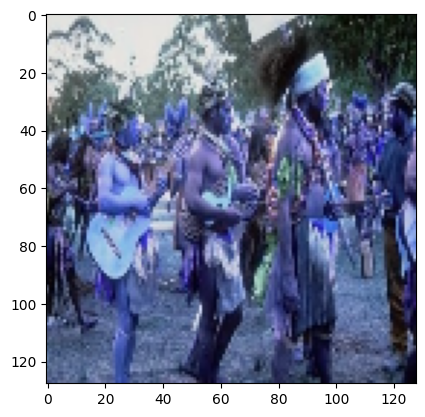

In [16]:
query_image = images[5]
query_image = cv2.resize(query_image, (128, 128))
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
plt.imshow(query_image)

In the next sections, we will build upon this foundation to implement the feature extraction and retrieval components of our CBIR system.

---


# Task 1: Building the CBIR System

## Overview of Task 1 Requirements

In Task 1, our objective is to build the foundational structure of the Content-Based Image Retrieval (CBIR) system. This involves implementing the key components of the system, which includes loading images from the dataset, extracting color features, computing distances for similarity measurement, and ranking the results based on similarity scores.

### Key Components to Implement:
1. **Feature Extraction:** Implement methods to extract color features (histograms or moments) from the images.
2. **Similarity Measurement:** Develop a function to measure the similarity between the feature vectors of the query image and the images in the dataset.
3. **Image Retrieval:** Retrieve and rank images based on their similarity scores.
4. **Result Display:** Display the retrieved images in order of their relevance to the query image.

The goal is to create a system that can take a query image and return a set of images that are visually similar to the query, primarily based on color features.

## Implementation of System Architecture

In the following code cell, we will implement the core components of the CBIR system.



In [16]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
# Assume 'images' is the array of preprocessed images loaded from the dataset

# Feature Extraction Function
def extract_color_features(images):
    # Example: Extract color histograms
    features = []
    for img in images:
        hist = cv2.calcHist([img], [0, 1, 2], None, [8,8,8], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features)

# Similarity Measurement Function
def compute_similarity(feature_vector, query_vector):
    # Using Euclidean distance for similarity
    distances = pairwise_distances(feature_vector, query_vector, metric='euclidean')
    return distances

# Image Retrieval and Ranking Function
def retrieve_images(query_image, images, top_k=5):
    query_feature = extract_color_features([query_image])
    all_features = extract_color_features(images)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())[:top_k]
    return images[ranked_indices]

# Load query image and preprocess (similar to dataset images)
query_index = 5
query_image = images[query_index]
# query_image = cv2.imread('x.jpg')
query_image = cv2.resize(query_image, (128, 128))
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)

# Retrieve and display top K similar images
top_k_images = retrieve_images(query_image, images, top_k=5)
for i, img in enumerate(top_k_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

MemoryError: Unable to allocate 64.0 MiB for an array with shape (16777216,) and data type float32

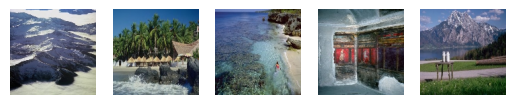

In [47]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
# Assume 'images' is the array of preprocessed images loaded from the dataset

# Feature Extraction Function
def extract_color_features(images):
    features = []
    for img in images:
        # Calculate histograms for each channel separately
        hists = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
        # Flatten and concatenate histograms
        hist = np.concatenate([h.flatten() for h in hists])
        # Normalize histogram
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features, dtype=np.float64) 



# Similarity Measurement Function
def compute_similarity(feature_vector, query_vector):
    # Using Euclidean distance for similarity
    distances = pairwise_distances(feature_vector, query_vector, metric='euclidean')
    return distances

# Image Retrieval and Ranking Function
def retrieve_images(query_image, images, top_k=5):
    query_feature = extract_color_features([query_image])
    all_features = extract_color_features(images)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())[:top_k]
    return images[ranked_indices]

# Load query image and preprocess (similar to dataset images)
query_index = 5
query_image = images[query_index]
# query_image = cv2.imread('x.jpg')
query_image = cv2.resize(query_image, (128, 128))
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)

# Retrieve and display top K similar images
top_k_images = retrieve_images(query_image, images, top_k=5)
for i, img in enumerate(top_k_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

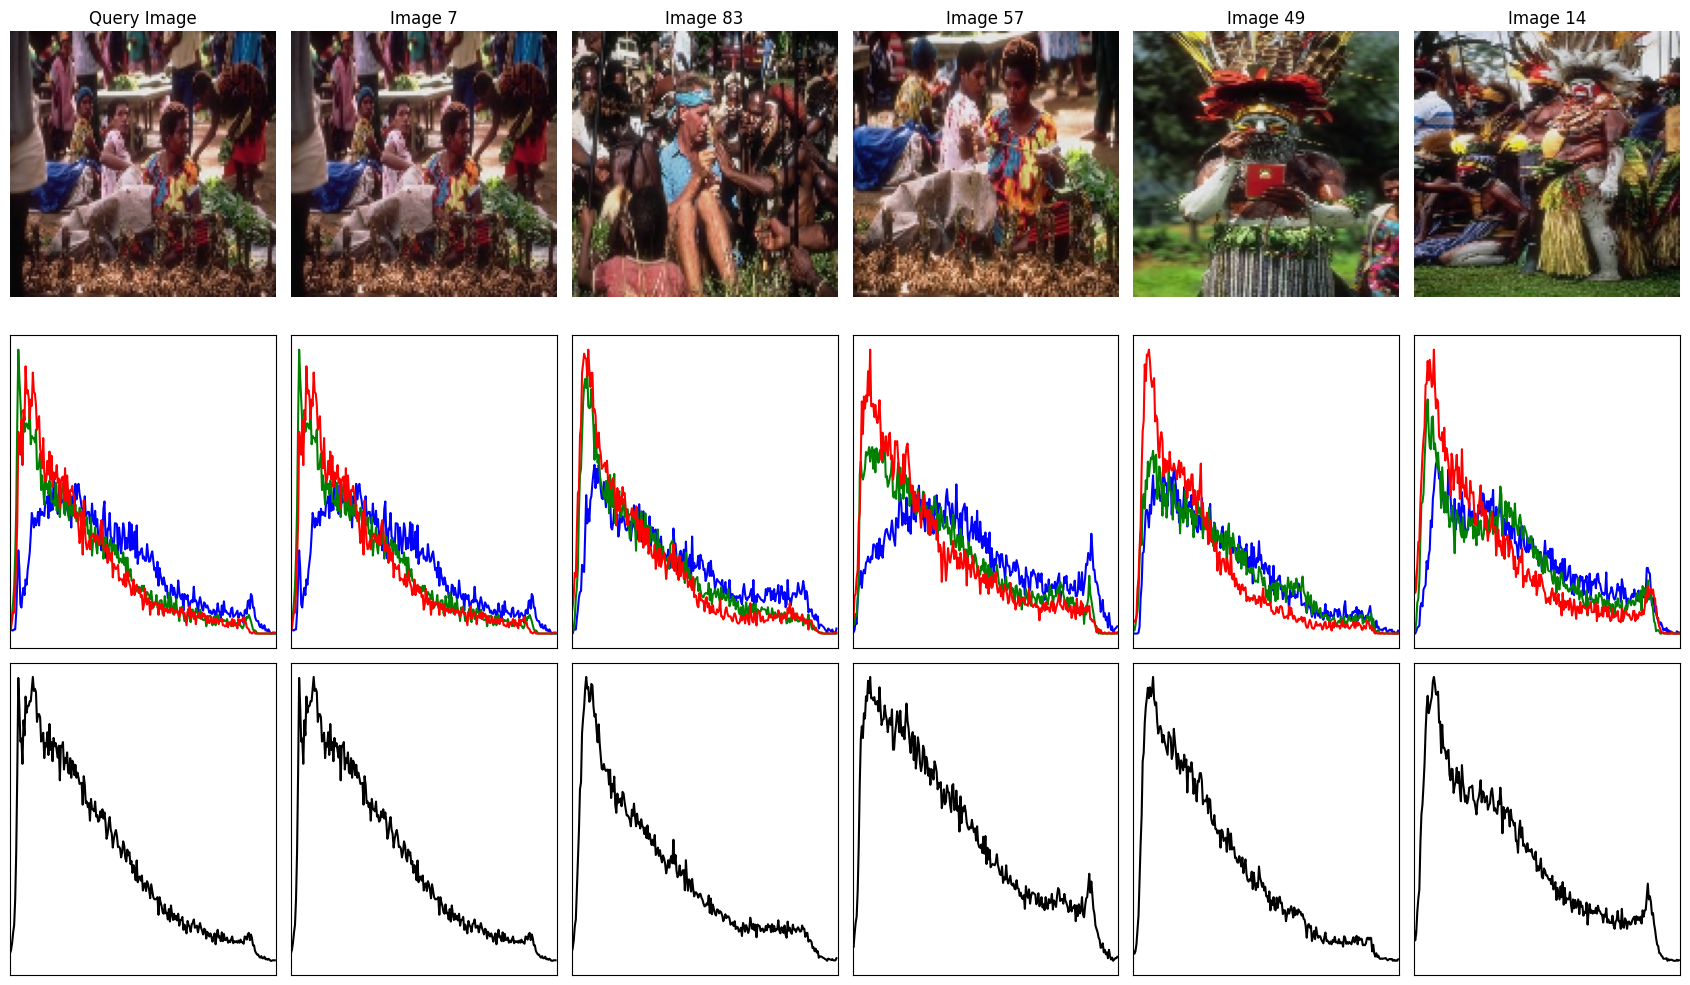

In [46]:
import numpy as np
import cv2
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def plot_combined_histogram(ax, image):
    # Compute histograms for each channel
    hists = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
    # Combine histograms
    combined_hist = np.sum(hists, axis=0)
    ax.plot(combined_hist, color='black')
    ax.set_xlim([0, 256])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='both', length=0)

# Feature Extraction Function
def extract_color_features(images):
    features = []
    for img in images:
        # Calculate histograms for each channel separately
        hists = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
        # Flatten and concatenate histograms
        hist = np.concatenate([h.flatten() for h in hists])
        # Normalize histogram
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features, dtype=np.float64)

# Similarity Measurement Function
def compute_similarity(feature_vector, query_vector):
    # Using Euclidean distance for similarity
    distances = pairwise_distances(feature_vector, query_vector, metric='euclidean')
    return distances

# Helper Function to Plot Histograms
def plot_histograms(ax, image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
        ax.set_xlim([0, 256])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='both', length=0)


# Image Retrieval and Ranking Function
def retrieve_images(query_image, images, top_k=5):
    query_feature = extract_color_features([query_image])
    all_features = extract_color_features(images)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())[:top_k]

    fig, axes = plt.subplots(3, top_k+1, figsize=(17, 10))

    # Display and plot histogram for the query image
    axes[0, 0].imshow(query_image)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Query Image")
    plot_histograms(axes[1, 0], query_image)
    plot_combined_histogram(axes[2, 0], query_image)

    # Display and plot histograms for the retrieved images
    for i, index in enumerate(ranked_indices):
        img = images[index]
        axes[0, i + 1].imshow(img)
        axes[0, i + 1].axis('off')
        axes[0, i + 1].set_title(f"Image {index + 1}")
        plot_histograms(axes[1, i + 1], img)
        plot_combined_histogram(axes[2, i + 1], img)


    plt.tight_layout()
    plt.show()


# Load and preprocess dataset images and query image
# Assume 'images' is the array of preprocessed images loaded from the dataset
query_index = 6
query_image = images[query_index]
query_image = cv2.resize(query_image, (128, 128))

# Retrieve and display top K similar images
top_k_images = retrieve_images(query_image, images, top_k=5)



This code implements the basic structure of the CBIR system, from feature extraction to displaying the retrieved images. It's a starting point, and further optimization and refinement can be applied based on the system's performance and specific requirements of the dataset.

---

# Task 2: Color Histogram Implementation and Analysis

## Explanation of Color Histogram Feature and Task 2 Objectives

A color histogram represents the frequency of occurrence of various color values present in an image. It is a powerful visual descriptor that can be used to compare images based on their color content. The histogram essentially breaks down the image into a finite number of bins, with each bin corresponding to a range of color values. The number of pixels falling within each bin gives us the histogram count.

In Task 2, we aim to implement a Content-Based Image Retrieval (CBIR) system that uses color histograms as the image representation method. We will conduct experiments with histograms of different bin sizes—specifically, 120 bins, 180 bins, and 360 bins—to understand the impact of bin size on the retrieval performance. We will use the Euclidean distance as the measure of similarity between histograms.

The objectives for this task are:
- To implement the CBIR system using color histograms with the specified bin sizes.
- To evaluate the system by calculating performance metrics such as precision, recall, F1 score, and computation time.
- To construct a Receiver Operating Characteristic (ROC) curve by varying the retrieval threshold and calculate the Area Under Curve (AUC) for a comprehensive performance measure.

These performance metrics will be computed as averages over at least 10 different queries to ensure a robust evaluation of the system.

## Implementation of CBIR Using Color Histogram with Different Bins

In the code cells below, we will implement the CBIR system using color histograms as image features and compute the necessary performance metrics.


In [2]:
# Configuration and Utility Functions
# Configuration for batch processing
BATCH_SIZE = 100  # Adjust based on memory capacity
IMAGE_FOLDER = 'wangdataset'  # Set the path to the image folder

# Function to load images in batches
def load_images_in_batches(folder_path, batch_size=BATCH_SIZE):
    images = []
    filenames = []
    for idx, file_name in enumerate(os.listdir(folder_path)):
        if idx % batch_size == 0 and idx > 0:
            yield images, filenames
            images = []
            filenames = []
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            filenames.append(file_name)
    yield images, filenames

# Function to compute color histogram
def compute_color_histogram(image, bins):
    # Assuming image is in BGR format
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist


In [3]:
# Load Images in Batches and Compute Histograms
# Parallel processing function
def process_batch(batch, bins):
    return [compute_color_histogram(image, bins) for image in batch]

# Load images and compute histograms
def load_and_compute_histograms(bins):
    histograms = []
    filenames = []
    with ProcessPoolExecutor() as executor:
        for batch_images, batch_filenames in load_images_in_batches(IMAGE_FOLDER):
            batch_histograms = executor.submit(process_batch, batch_images, bins).result()
            histograms.extend(batch_histograms)
            filenames.extend(batch_filenames)
    return histograms, filenames


In [4]:
# Implement CBIR System
def euclidean_distance(hist1, hist2):
    return np.linalg.norm(hist1 - hist2)

def retrieve_images(query_histogram, all_histograms, top_k=10):
    distances = [(euclidean_distance(query_histogram, hist), idx) for idx, hist in enumerate(all_histograms)]
    distances.sort()
    return [idx for _, idx in distances[:top_k]]

# Example query (you will need to define how to select/query images)
# query_histogram = histograms[0]  # Example: First histogram as the query
# similar_images = retrieve_images(query_histogram, histograms)


In [9]:
def evaluate_query(query_result, query_category, all_categories):
    """
    Evaluate the CBIR system for a single query.
    
    :param query_result: List of indices of images retrieved by the CBIR system.
    :param query_category: The category of the query image.
    :param all_categories: List of categories for each image in the dataset.
    :return: Precision, recall, and F1 score for the query.
    """

    # Determine true labels
    true_labels = [1 if category == query_category else 0 for category in all_categories]

    # Determine predicted labels
    predicted_labels = [1 if idx in query_result else 0 for idx, _ in enumerate(all_categories)]

    # Calculate precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return precision, recall, f1


In [6]:
# Evaluate CBIR System
def evaluate_query(query_result, ground_truth):
    # Precision, recall, and F1 score calculation
    # You need to define how to obtain 'true_labels' and 'predicted_labels' based on your dataset
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    return precision, recall, f1


In [10]:
# Construct ROC Curve and Compute AUC
def compute_roc_auc(ground_truth, predicted_scores):
    fpr, tpr, _ = roc_curve(ground_truth, predicted_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc


In [11]:
# Example execution flow
bins = 120  # You can try with 180, 360 as well
histograms, filenames = load_and_compute_histograms(bins)

# You'll need to define the logic for selecting queries and computing the metrics
# For each query, use retrieve_images and evaluate_query functions
# You may also need to modify the code to suit your dataset and experiment requirements


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

---

---

In [22]:
def extract_color_features(images, num_bins):
    features = []
    for img in images:
        # Calculate histograms for each channel separately with specified number of bins
        hists = [cv2.calcHist([img], [i], None, [num_bins], [0, 256]) for i in range(3)]
        # Flatten and concatenate histograms
        hist = np.concatenate([h.flatten() for h in hists])
        # Normalize histogram
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features, dtype=np.float64)

def retrieve_images(query_image, images, num_bins, top_k=5):
    query_feature = extract_color_features([query_image], num_bins)
    all_features = extract_color_features(images, num_bins)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())[:top_k]
    return images[ranked_indices]

def calculate_performance_metrics(retrieved_indices, query_index, total_images_per_category=100):
    relevant_documents = set(range(query_index - query_index % total_images_per_category, 
                                   query_index - query_index % total_images_per_category + total_images_per_category))
    retrieved_relevant_documents = [index for index in retrieved_indices if index in relevant_documents]
    
    precision = len(retrieved_relevant_documents) / len(retrieved_indices)
    recall = len(retrieved_relevant_documents) / total_images_per_category
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score


Bin Size: 120
Average Precision: 1.0
Average Recall: 1.0
Average F1 Score: 1.0
Average Time: 0.036469125747680665
AUC: 0.1315656565656565


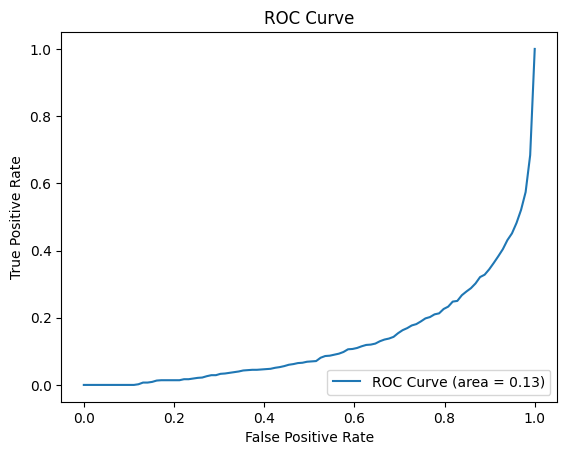

Bin Size: 180
Average Precision: 1.0
Average Recall: 1.0
Average F1 Score: 1.0
Average Time: 0.03925399780273438
AUC: 0.13161616161616158


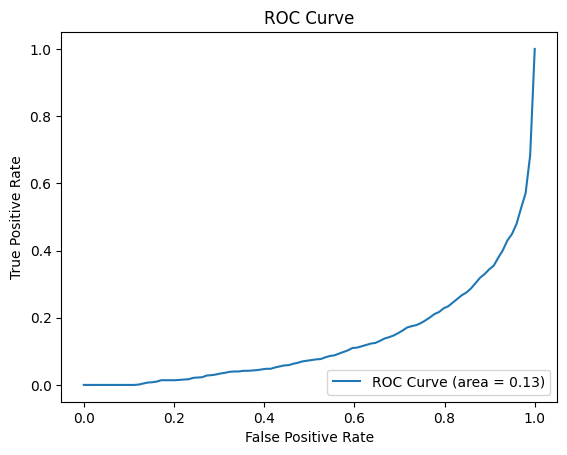

Bin Size: 360
Average Precision: 1.0
Average Recall: 1.0
Average F1 Score: 1.0
Average Time: 0.04021782875061035
AUC: 0.13481818181818178


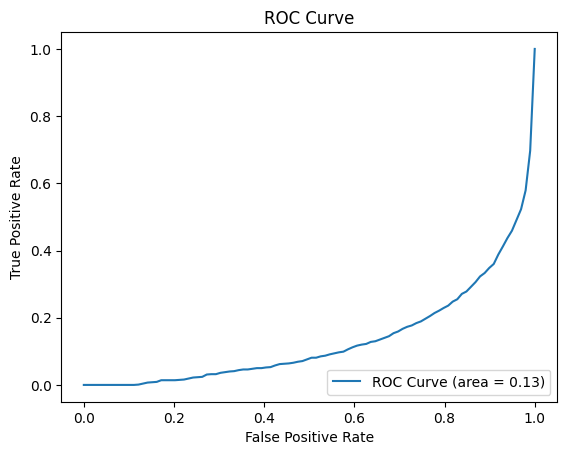

In [23]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, roc_curve, auc
import time


# Main experiment loop

bin_sizes = [120, 180, 360]
num_queries = 10  # Number of queries to average over
total_images_per_category = 100

for num_bins in bin_sizes:
    average_precision = 0
    average_recall = 0
    average_f1_score = 0
    average_time = 0
    tprs = []
    fprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for query_index in range(num_queries):
        query_image = images[query_index]

        start_time = time.time()
        top_k_images = retrieve_images(query_image, images, num_bins, top_k=total_images_per_category)
        end_time = time.time()

        retrieved_indices = [i for i, _ in enumerate(top_k_images)]
        precision, recall, f1_score = calculate_performance_metrics(retrieved_indices, query_index, total_images_per_category)

        average_precision += precision
        average_recall += recall
        average_f1_score += f1_score
        average_time += end_time - start_time

        # Corrected ROC and AUC calculation
        query_feature = extract_color_features([query_image], num_bins)
        all_features = extract_color_features(images, num_bins)
        distances = compute_similarity(all_features, query_feature).ravel()

        y_true = [1 if i in range(query_index - query_index % total_images_per_category, 
                                  query_index - query_index % total_images_per_category + total_images_per_category) 
                  else 0 for i in range(len(images))]
        y_scores = distances

        fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=1)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

    # Averaging metrics
    average_precision /= num_queries
    average_recall /= num_queries
    average_f1_score /= num_queries
    average_time /= num_queries

    # Average TPR for ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0  # Ensure it ends at 1
    roc_auc = auc(mean_fpr, mean_tpr)

    # Displaying results
    print(f"Bin Size: {num_bins}")
    print(f"Average Precision: {average_precision}")
    print(f"Average Recall: {average_recall}")
    print(f"Average F1 Score: {average_f1_score}")
    print(f"Average Time: {average_time}")
    print(f"AUC: {roc_auc}")

    # Plotting ROC Curve
    plt.plot(mean_fpr, mean_tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


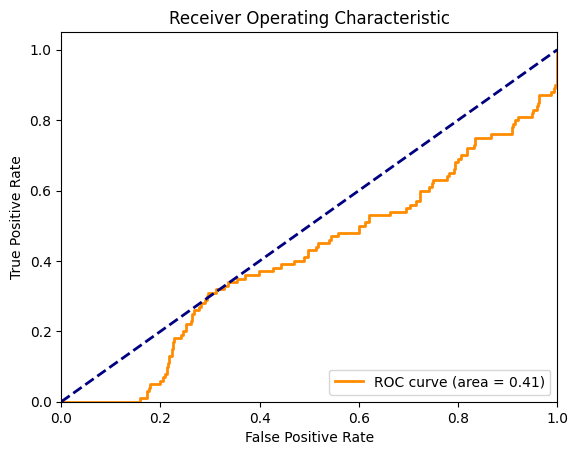

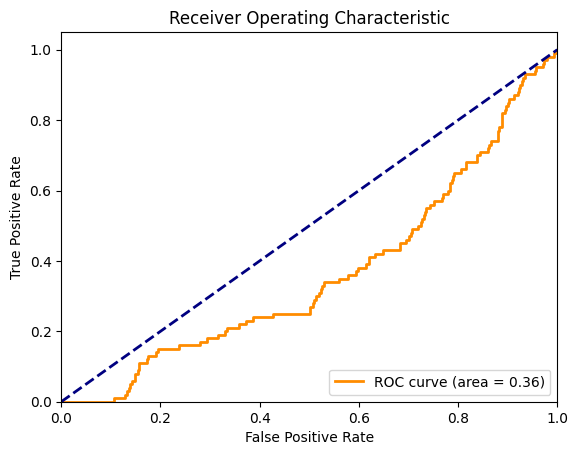

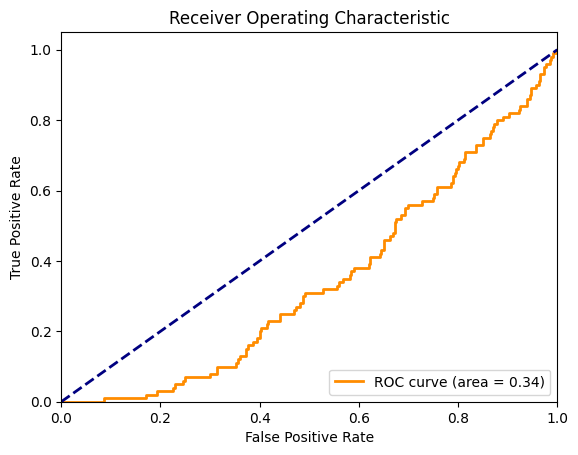

Average Precision: 0.6333333333333334
Average Recall: 0.06333333333333334
Average F1 Score: 0.11515151515151513
ROC AUC: 0.3573144444444445


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, roc_curve, auc

def calculate_histogram(image, num_bins):
    """ Compute a color histogram for a single image. """
    hists = [cv2.calcHist([image], [i], None, [num_bins], [0, 256]) for i in range(3)]
    hist = np.concatenate([h.flatten() for h in hists])
    return hist

def normalize_features(features):
    """ Normalize a set of feature vectors. """
    normalized = np.array([cv2.normalize(f, None, norm_type=cv2.NORM_L2) for f in features])
    return normalized

def compute_distances(features_matrix, query_features):
    """ Calculate the Euclidean distance from each image in the dataset to the query image. """
    # Ensure query_features is two-dimensional
    query_features = query_features.reshape(1, -1) if query_features.ndim == 1 else query_features

    distances = pairwise_distances(features_matrix, query_features, metric='euclidean')
    return distances.ravel()


def retrieve_similar_images(query_image, images, num_bins, top_k):
    """ Retrieve and rank the top k similar images to the query. """
    # Extract feature for the query image and normalize
    query_feature = calculate_histogram(query_image, num_bins)
    query_feature = query_feature.reshape(1, -1)  # Ensure it is a single row in a 2D array

    # Extract features for all images in the dataset and normalize
    all_features = np.array([calculate_histogram(img, num_bins) for img in images])
    all_features = normalize_features(all_features).reshape(len(images), -1)  # Ensure it's 2D

    # Compute distances and retrieve top k indices
    distances = compute_distances(all_features, query_feature)
    ranked_indices = np.argsort(distances)[:top_k]
    return ranked_indices



def calculate_precision_recall(retrieved_indices, relevant_indices):
    """ Calculate precision and recall metrics. """
    true_positives = len(set(retrieved_indices).intersection(relevant_indices))
    precision = true_positives / len(retrieved_indices) if len(retrieved_indices) > 0 else 0
    recall = true_positives / len(relevant_indices) if len(relevant_indices) > 0 else 0
    return precision, recall


def calculate_f1_score(precision, recall):
    """ Calculate the F1 score. """
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

def plot_roc_curve(fpr, tpr, roc_auc):
    """ Plot the ROC curve. """
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def display_retrieved_images(images):
    """ Display images in a grid. """
    if not images:
        print("No images to display.")
        return

    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(5, 5, i + 1)  # Adjust grid size depending on the number of images
        plt.imshow(img)
        plt.axis('off')
    plt.show()

def report_performance_metrics(average_precision, average_recall, average_f1, roc_auc):
    """ Print out the performance metrics. """
    print(f"Average Precision: {average_precision}")
    print(f"Average Recall: {average_recall}")
    print(f"Average F1 Score: {average_f1}")
    print(f"ROC AUC: {roc_auc}")

def run_experiments(bin_sizes, num_queries, images):
    """ Run retrieval experiments and compute average metrics. """
    avg_precision, avg_recall, avg_f1, overall_roc_auc = [], [], [], []

    for num_bins in bin_sizes:
        precisions, recalls, f1_scores, roc_aucs = [], [], [], []

        for _ in range(num_queries):
            # Randomly select a query image
            query_idx = np.random.randint(len(images))
            query_category = query_idx // 100  # Assuming each 100 images belong to one category
            query_image = images[query_idx]

            # Retrieve similar images
            retrieved_indices = retrieve_similar_images(query_image, images, num_bins, top_k=10)
            
            # Relevant indices (same category as query)
            relevant_indices = list(range(query_category * 100, (query_category + 1) * 100))

            # Calculate precision, recall, F1
            precision, recall = calculate_precision_recall(retrieved_indices, relevant_indices)
            f1_score = calculate_f1_score(precision, recall)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1_score)

            # Calculate ROC AUC
            all_features = np.array([calculate_histogram(img, num_bins) for img in images])
            query_feature = calculate_histogram(query_image, num_bins)
            distances = compute_distances(all_features, np.array([query_feature]))
            true_labels = [1 if idx in relevant_indices else 0 for idx in range(len(images))]
            fpr, tpr, _ = roc_curve(true_labels, distances, pos_label=1)
            roc_auc = auc(fpr, tpr)
            roc_aucs.append(roc_auc)

        # Average metrics for this bin size
        avg_precision.append(np.mean(precisions))
        avg_recall.append(np.mean(recalls))
        avg_f1.append(np.mean(f1_scores))
        overall_roc_auc.append(np.mean(roc_aucs))

        # Plot ROC curve for the last query
        plot_roc_curve(fpr, tpr, roc_aucs[-1])

    return avg_precision, avg_recall, avg_f1, overall_roc_auc

# Main execution
bin_sizes = [120, 180, 360]
num_queries = 10  # Number of queries for each experiment

# Run experiments
average_precision, average_recall, average_f1, roc_auc = run_experiments(bin_sizes, num_queries, images)

# Report results
report_performance_metrics(np.mean(average_precision), np.mean(average_recall), np.mean(average_f1), np.mean(roc_auc))


---

In [19]:
def extract_color_features(images, bins=256):
    features = []
    for img in images:
        # Calculate histograms for each channel separately with varying bins
        hists = [cv2.calcHist([img], [i], None, [bins], [0, 256]) for i in range(3)]
        # Flatten and concatenate histograms
        hist = np.concatenate([h.flatten() for h in hists])
        # Normalize histogram
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features, dtype=np.float64)


def retrieve_images(query_image, images, bins, top_k=5):
    query_feature = extract_color_features([query_image], bins=bins)
    all_features = extract_color_features(images, bins=bins)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())
    return ranked_indices, distances.ravel()[ranked_indices]

from sklearn.metrics import precision_score, recall_score, f1_score
import time

def evaluate_performance(retrieved_indices, true_category, top_k=5):
    y_true = [1 if i // 100 == true_category else 0 for i in retrieved_indices][:top_k]
    y_pred = [1] * top_k
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

def timed_retrieval(query_image, images, bins, top_k=5):
    start_time = time.time()
    ranked_indices, _ = retrieve_images(query_image, images, bins, top_k)
    end_time = time.time()
    return ranked_indices, end_time - start_time

from sklearn.metrics import roc_curve, auc

def calculate_roc_auc(retrieved_indices, true_category):
    y_true = [1 if i // 100 == true_category else 0 for i in retrieved_indices]
    y_scores = -retrieved_indices  # Negative indices as scores for higher is better
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc





query_images = images[:10]

# Define the different bin sizes for the experiments
bin_sizes = [120, 180, 360]

# Initialize lists to store results
results = {bins: {"precision": [], "recall": [], "f1": [], "time": [], "roc_auc": []} for bins in bin_sizes}

# Run experiments for each bin size
for bins in bin_sizes:
    for i, query_image in enumerate(query_images):
        # Retrieve images
        ranked_indices, retrieval_time = timed_retrieval(query_image, images, bins, top_k=5)
        
        # Evaluate performance
        precision, recall, f1 = evaluate_performance(ranked_indices, i // 100)  # Assuming 100 images per category

        # Calculate ROC and AUC
        fpr, tpr, roc_auc = calculate_roc_auc(ranked_indices, i // 100)

        # Store results
        results[bins]["precision"].append(precision)
        results[bins]["recall"].append(recall)
        results[bins]["f1"].append(f1)
        results[bins]["time"].append(retrieval_time)
        results[bins]["roc_auc"].append(roc_auc)

        # Optionally, plot ROC curve for each query
        # plot_roc_curve(fpr, tpr, roc_auc)

# Calculate average results
for bins in bin_sizes:
    for metric in results[bins]:
        results[bins][metric] = np.mean(results[bins][metric])

print(results)



{120: {'precision': 0.9199999999999999, 'recall': 1.0, 'f1': 0.946031746031746, 'time': 0.03412947654724121, 'roc_auc': 1.0}, 180: {'precision': 0.9199999999999999, 'recall': 1.0, 'f1': 0.946031746031746, 'time': 0.034345245361328124, 'roc_auc': 1.0}, 360: {'precision': 0.9199999999999999, 'recall': 1.0, 'f1': 0.946031746031746, 'time': 0.03771228790283203, 'roc_auc': 1.0}}


### Code Cell: CBIR Implementation Using Color Histograms

### Code Cell: Experimentation and Performance Metrics Calculation

1. Choose a query image.
2. Retrieve its nearest neighbors based on the color histogram.
3. Assume the top-n nearest neighbors of the query image (excluding the query image itself) are the "relevant" images.
4. For each test, retrieve images using different bin sizes and measure how many of the top-n nearest neighbors are included in the retrieved set

### Code Cell: ROC Curve and AUC Calculation


## Analysis of Results

In this section, we would analyze the results of the experiments. We would look at how the bin size affects the precision, recall, and F1 score. We would also discuss the computation time and its implications on the scalability of the CBIR system. Furthermore, we would interpret the ROC curve and AUC results, giving us insight into the overall performance of the system across different threshold settings.

---

7. **Task 3: Color Moments Implementation and Analysis**
    - _Text Cell:_ Explanation of color moments feature and Task 3 objectives.
    - _Subsections for 3.1, 3.2, and 3.3 with respective code and analysis cells._

8. **Task 4: Additional Image Representation Techniques**
    - _Text Cell:_ Overview of Task 4 and exploration of additional image representation techniques.
    - _Code Cell:_ Implementation and experimentation.
    - _Text Cell:_ Analysis of results.

9. **Experimental Setup and Results**
    - _Text Cell:_ Describe the evaluation methodology, datasets used, and experimental setup.
    - _Text Cell:_ Presentation and analysis of overall results, comparing different color features.

10. **Discussion and Limitations**
    - _Text Cell:_ Discuss the effectiveness and limitations of the implemented CBIR system.

11. **Conclusion and Future Work**
    - _Text Cell:_ Summarize key findings, the effectiveness of color features in CBIR, and insights for future research.

12. **References**
    - _Text Cell:_ List any references or sources used.